In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Converting categorical into boolean using get_dummies 
# Getting the predicted values in terms of 0 and 1
Y = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [4]:
Y.head()

,['y']_yes
0,0
1,0
2,0
3,0
4,0


In [5]:
# Looking at statistics of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
Y = (df['y'] == 'Yes')*1

In [8]:
df.drop('y', axis = 1, inplace = True)

In [9]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994

### Exploratory Data Analysis
    1. Visualizing some of the parameters as to how they are distributed. 

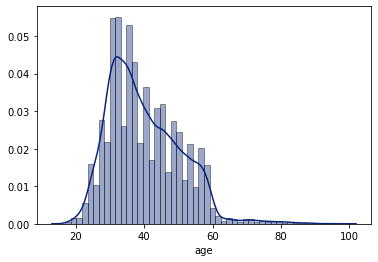

In [10]:
# Visaulizing age in the dataset
sns.distplot(df['age'], hist = True, color = "#07247D", hist_kws = {'edgecolor':'black'})

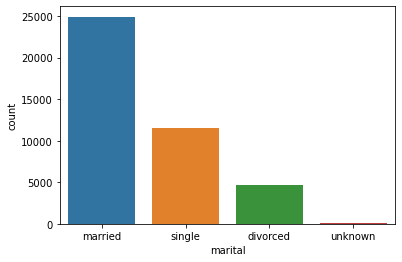

In [11]:
# Visualizing the marital status
sns.countplot(df['marital'])

In [12]:
# checking number of categories in education
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

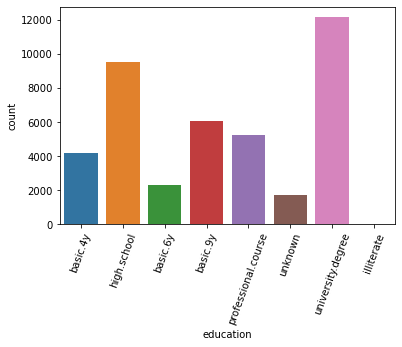

In [13]:
# Visualizing count of education
fig_edu = sns.countplot(x = 'education', data = df)
fig_edu.set_xticklabels(fig_edu.get_xticklabels(), rotation=70)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

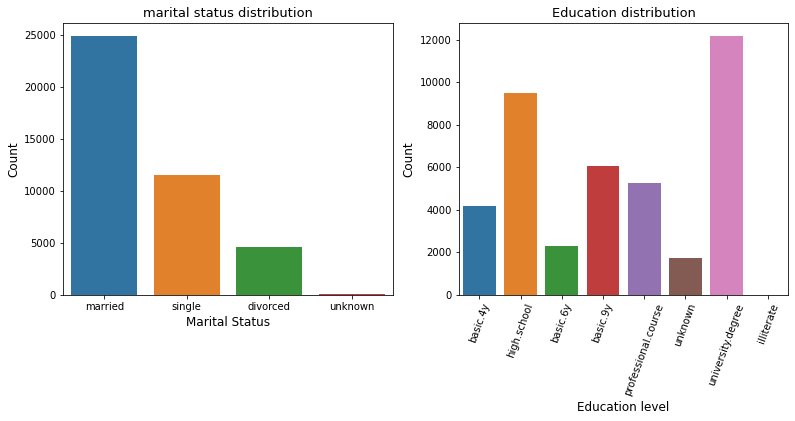

In [14]:
# Visualizing the above two using subplots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)

### Visualizing how JOBS are distribution

Text(0.5, 1.0, 'Job Count Distribution')

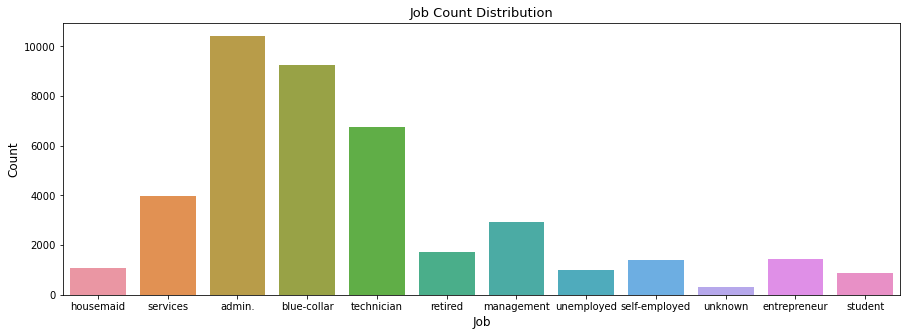

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = df)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

### Housing and Loan Distribution

1. Checking how Housing Loans and Personal Loans are distributed. 

Text(0, 0.5, 'Count')

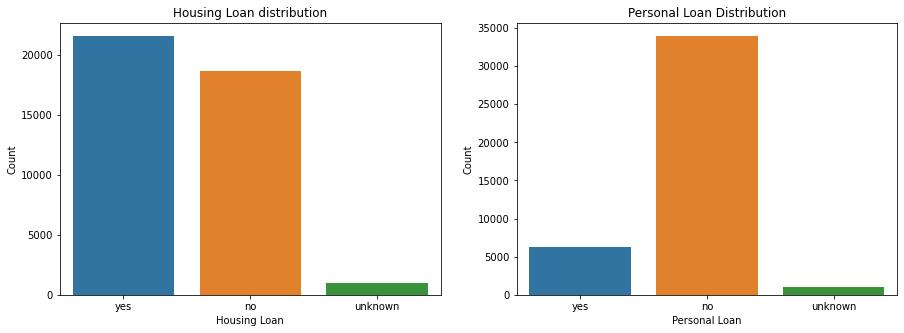

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = df, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

sns.countplot(x = "loan", data = df, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### Getting total count 
Getting count of number of Defaulters, people with Housing loan and Personal loan

Credit Defaulter

In [18]:
print("Number of people with credit default: ", df[df['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", df[df['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", df[df['default'] == 'unknown']['default'].count())

Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


Housing Loan

In [19]:
print("Number of people with Housing loan: ", df[df['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", df[df['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", df[df['housing'] == 'unknown']['housing'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


Personal Loan

In [20]:
print("Number of people with Personal loan: ", df[df['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", df[df['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", df[df['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


### Visualisation related to "Last Contact of the Current Campain" 

<i> Visualisation related to Duration </i>

Plotting duration using boxplot makes it difficult to obtain some important values like average of distribution and so I am plotting histogram on the side to see how its distributed and check for mean value (If its possible). 

Text(0.5, 1.0, 'Call Duration vs Count')

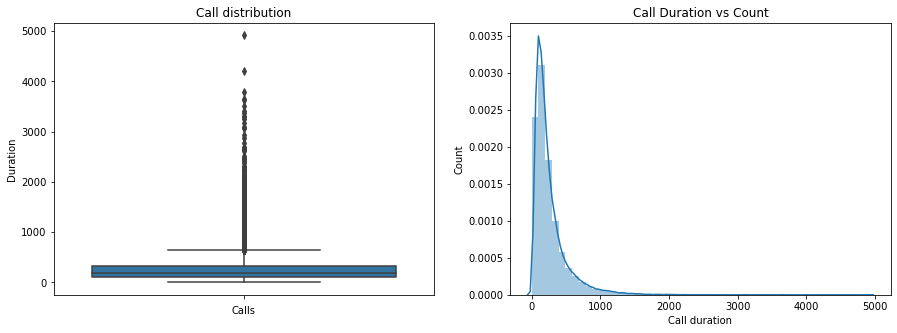

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(df['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")

Getting all the Mean, Standard Diveation, Minimum and Maximum values for duration  

In [22]:
min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


We can see from the box plot that most call duration is around the mean so finding the interquartile range will help us in understanding how long the call might last

In [23]:
first_quartile = df['duration'].quantile(q = 0.25)
second_quartile = df['duration'].quantile(q = 0.50)
third_quartile = df['duration'].quantile(q = 0.75)
fourth_quartile = df['duration'].quantile(q = 1)
IRQ = third_quartile - second_quartile

print("Second Quartile: ", second_quartile)
print("Third Quartile: ", third_quartile)
print("Inter quartile range(range within which most data is present): ",IRQ)

Second Quartile:  180.0
Third Quartile:  319.0
Inter quartile range(range within which most data is present):  139.0


 <i> Visualisation related to "Contact, Month and Day of the week" </i>

Text(0.5, 1.0, 'Count of Calls made on Days of the week')

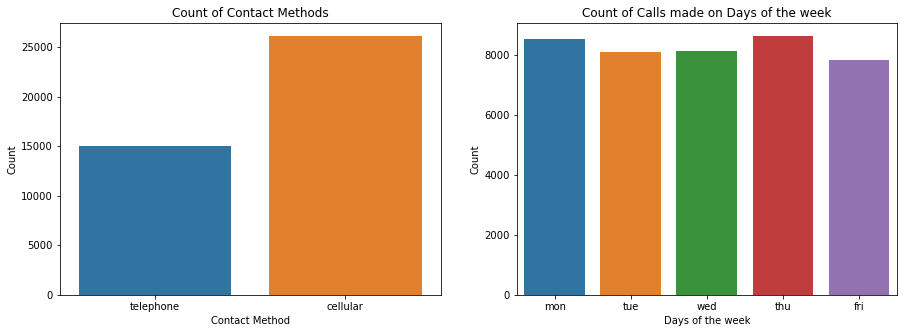

In [24]:
# For contact and Days of the week
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")


Text(0.5, 1.0, 'Count of contacts made in each month')

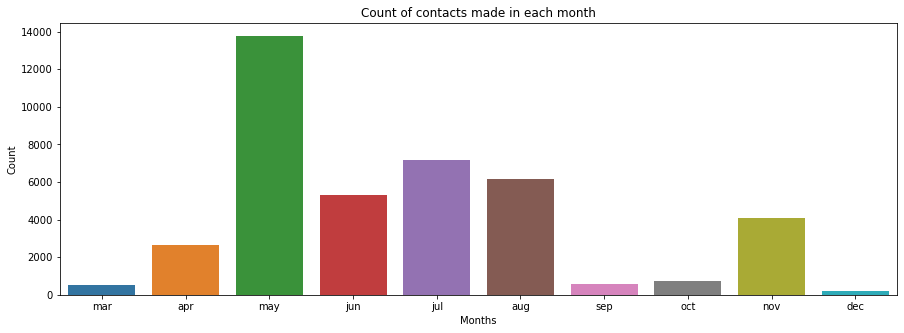

In [26]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = df, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Finding the average duration of call with people holding different jobs

Text(0.5, 1.0, 'Duration vs Jobs')

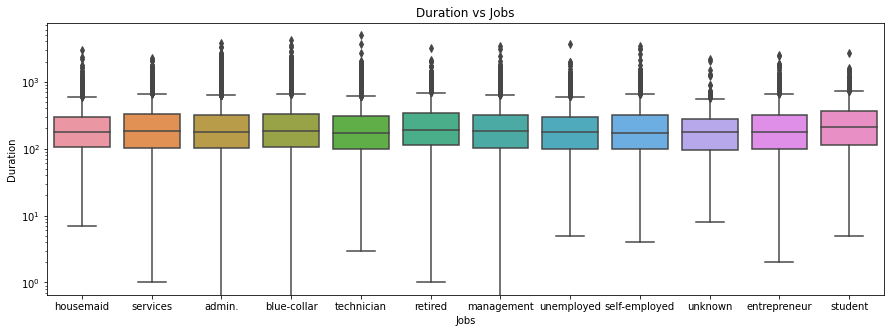

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Checking if there is a relation between average duration of call and eduacation 

Text(0.5, 1.0, 'log(Duration) vs Education')

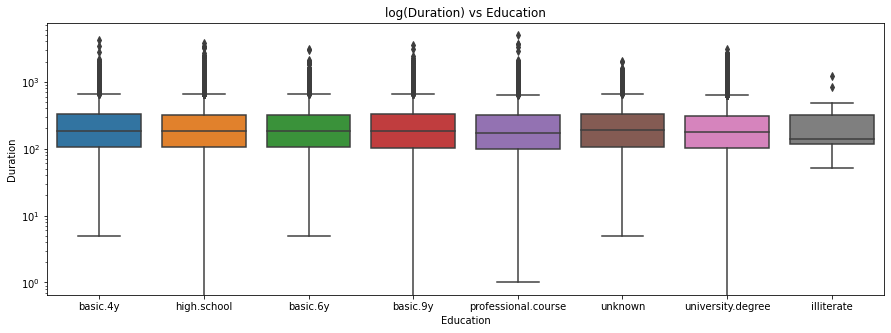

In [33]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

## 2. Categorical Treatment

In [34]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')